In [1]:
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

#-----------------Mätning1------------------------------------
Spänning1_1_file = r'./Mätningar/Ångström_1/Spänning1.csv'
Spänning1_2_file = r'./Mätningar/Ångström_1/Spänning2.csv'
Temperatur1_1_file = r'./Mätningar/Ångström_1/Temperatur1.csv'
Temperatur1_2_file = r'./Mätningar/Ångström_1/Temperatur2.csv'
#-----------------Mätning2------------------------------------
Spänning2_1_file = r'./Mätningar/Ångström_2/Spänning1.csv'
Spänning2_2_file = r'./Mätningar/Ångström_2/Spänning2.csv'
Temperatur2_1_file = r'./Mätningar/Ångström_2/Temperatur1.csv'
Temperatur2_2_file = r'./Mätningar/Ångström_2/Temperatur2.csv'
#-----------------Mätning2------------------------------------
Spänning3_1_file = r'./Mätningar/Ångström_3/Spänning1.csv'
Spänning3_2_file = r'./Mätningar/Ångström_3/Spänning2.csv'
Temperatur3_1_file = r'./Mätningar/Ångström_3/Temperatur1.csv'
Temperatur3_2_file = r'./Mätningar/Ångström_3/Temperatur2.csv'

In [13]:
class Data:

    def __init__(self, data, Mätintervall):
        self.datadict = {}
        self.datadict['Time'] = []
        self.datadict['Amplitude'] = []
        with open(data, 'r', encoding='utf-8') as file:
            for row in file:
                if row[0].isnumeric():
                    r = row.split(';')
                    self.datadict['Time'].append(int(r[0])*Mätintervall)
                    self.datadict['Amplitude'].append(float('.'.join(r[1][:-1].split(','))))
        return
    def t(self):
        return self.datadict['Time']
    
    def a(self):
        return self.datadict['Amplitude']

In [14]:
Temperatur1_1 = Data(Temperatur1_1_file, 5)
Temperatur1_2 = Data(Temperatur1_2_file, 5)
Temperatur2_1 = Data(Temperatur2_1_file, 2)
Temperatur2_2 = Data(Temperatur2_2_file, 2)
Temperatur3_1 = Data(Temperatur2_1_file, 2)
Temperatur3_2 = Data(Temperatur2_2_file, 2)

In [33]:
def grab_peaks(Dict):
    

In [17]:
print(Temperatur1_1.t())

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995, 1000, 1005, 1010, 101

0.0016674722087965201


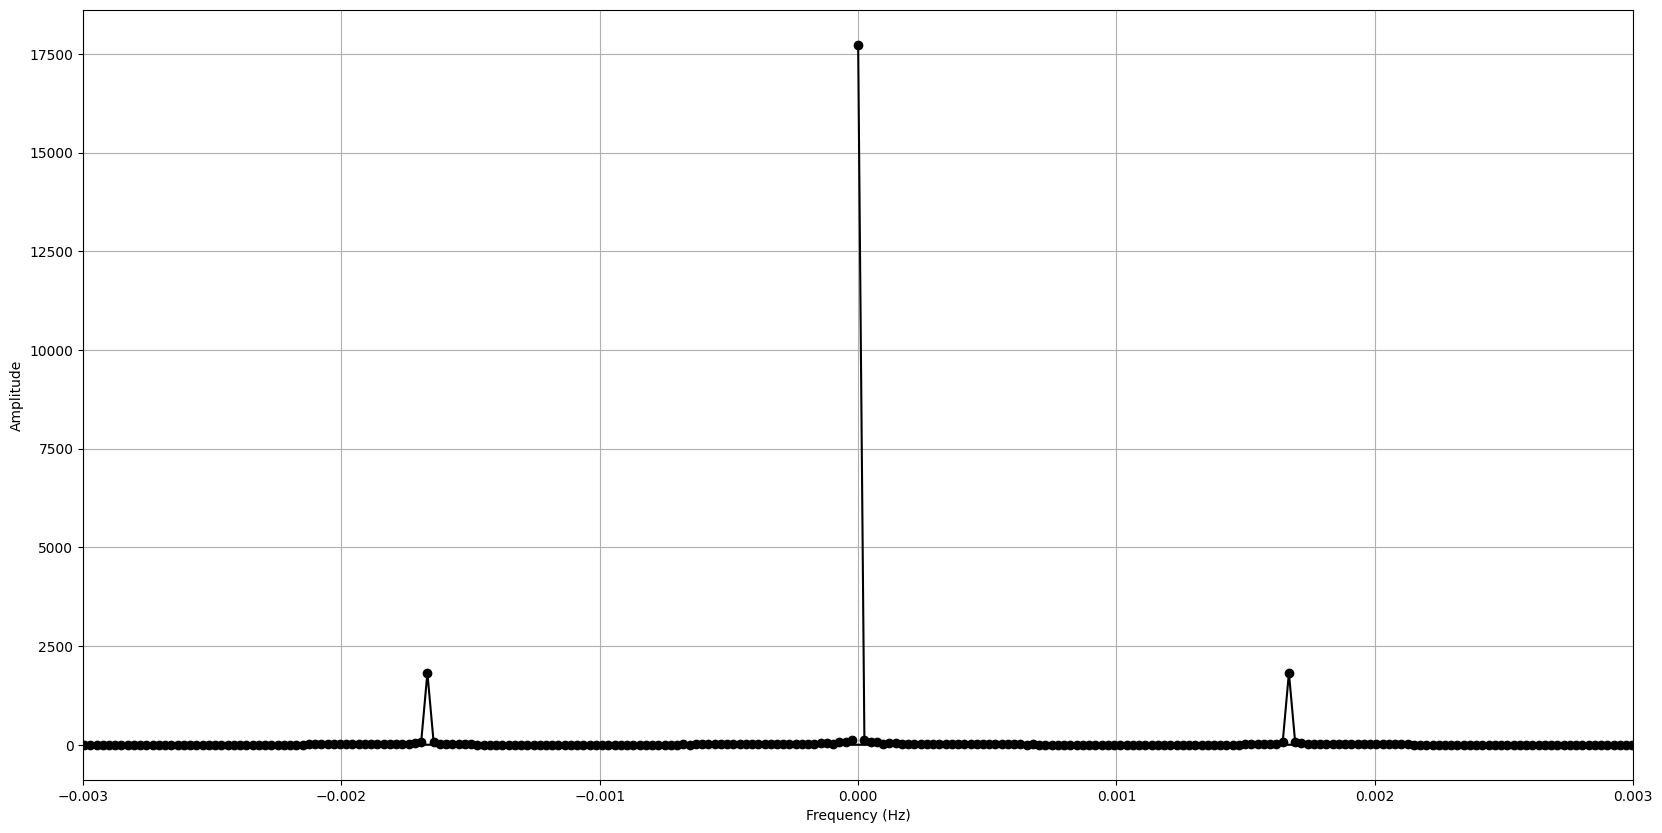

In [50]:
def Oscillation_Frequency(x, y):
    x, y = np.array(x), np.array(y)
    Freq_Amplitudes = np.abs(np.fft.fft(y))
    Freq = np.fft.fftfreq(len(x), x[1]-x[0])
    FFT = {}
    for i in range(len(Freq)):
        FFT[np.abs(Freq_Amplitudes[i])] = Freq[i]
    sorted_list = sorted(FFT.items(), key = lambda x:x[0])
    return Freq, Freq_Amplitudes, FFT[sorted_list[-2][0]]

Freq, Freq_Amplitudes, Frequency = Oscillation_Frequency(Temperatur1_1.df['Time'][2500:], Temperatur1_1.df['Y'][2500:])
print(Frequency)
plt.figure(figsize=(20, 10))
plt.plot(Freq, Freq_Amplitudes, 'ko-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim([-0.003, 0.003])
plt.show()